## Main Goal
In this project, we aim to examine the performance of various machine learning models for predicting sales of video games based on their attributes!  

### Data Understanding
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of [vgchartz.com].
1. **Rank** - Ranking of overall sales
2. **Name** - The games name
3. **Platform** - Platform of the games release (i.e. PC,PS4, etc.)
4. **Year** - Year of the game's release
5. **Genre** - Genre of the game
6. **Publisher** - Publisher of the game
7. **NA_Sales** - Sales in North America (in millions)
8. **EU_Sales** - Sales in Europe (in millions)
9. **JP_Sales** - Sales in Japan (in millions)
10. **Other_Sales** - Sales in the rest of the world (in millions)
11. **Global_Sales** - Total worldwide sales.

Dataset is downloaded from: [https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download]

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dataset = pd.read_csv("datasets/vgsales.csv")

In [3]:
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
dataset.shape

(16598, 11)

In [6]:
dataset.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### Dealing With Null values
We assume that there are no underlying patterns in 'Year' and 'Publisher' missing values, and the missing values happened randomly!  
So therefore we remove the rows that have missing values!

In [21]:
# Drop rows with missing values in 'year' and 'publisher'
cleaned_dataset = dataset.dropna(subset=['Year', 'Publisher'])

In [22]:
cleaned_dataset.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### Exploratory Data Analysis
#### What is the overall distribution of Global_Sales and do any outliers stand out in this distribution?

In [14]:
cleaned_dataset['Global_Sales'].nunique()

621

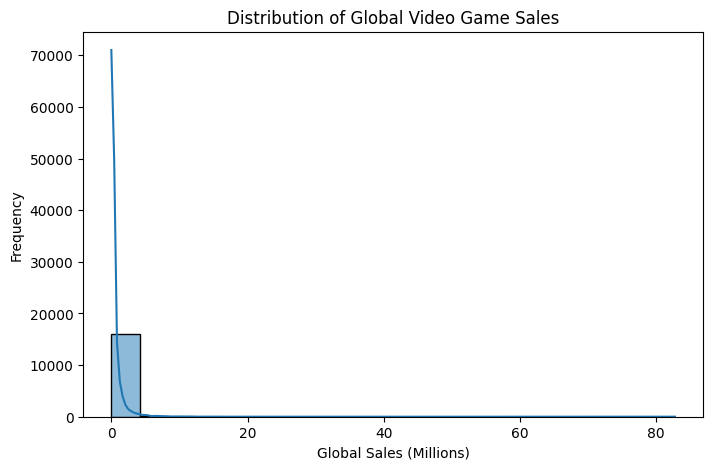

In [13]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_dataset['Global_Sales'], bins=20, kde=True)
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Video Game Sales')
plt.show()

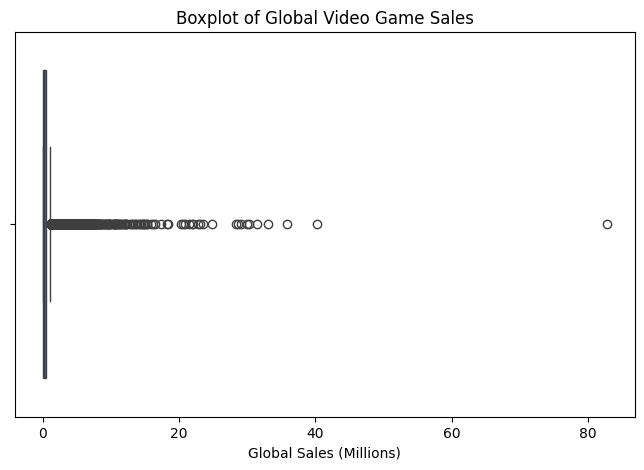

In [15]:
# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=cleaned_dataset['Global_Sales'])
plt.xlabel('Global Sales (Millions)')
plt.title('Boxplot of Global Video Game Sales')
plt.show()

In [35]:
# Filtering games with Global Sales in the range of 0 to 10 million
filtered_dataset = cleaned_dataset[(cleaned_dataset['Global_Sales'] >= 0.0) & (cleaned_dataset['Global_Sales'] <= 10.00)]

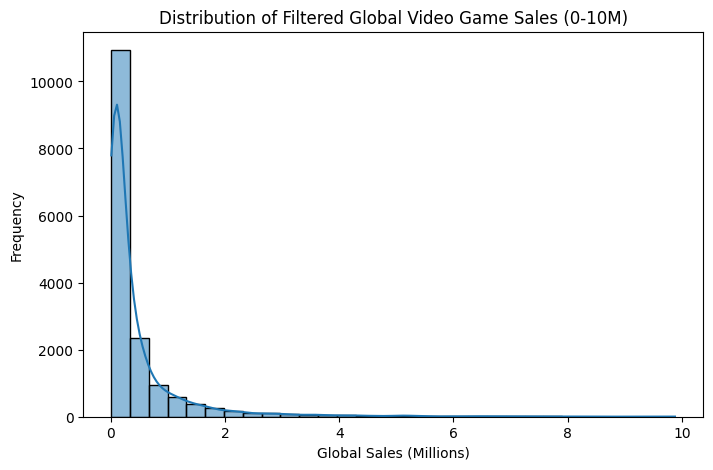

In [36]:
# Visualizing the new distribution
plt.figure(figsize=(8, 5))
sns.histplot(filtered_dataset['Global_Sales'], bins=30, kde=True)
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Filtered Global Video Game Sales (0-10M)')
plt.show()

In [41]:
# Calculate Q1, Q3, and IQR
Q1 = filtered_dataset['Global_Sales'].quantile(0.25)
Q3 = filtered_dataset['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_no_outliers = filtered_dataset[(filtered_dataset['Global_Sales'] >= lower_bound) & (filtered_dataset['Global_Sales'] <= upper_bound)]


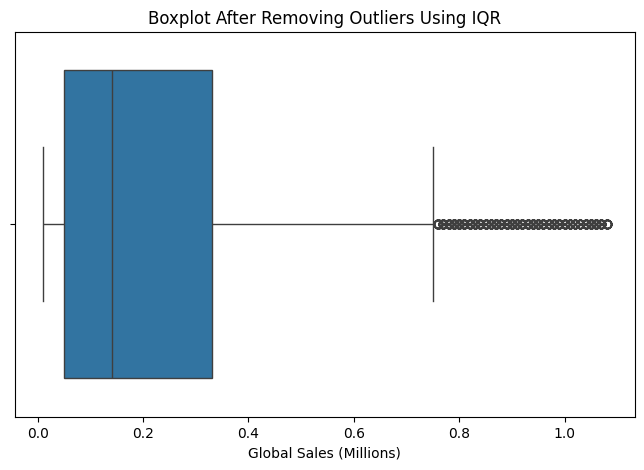

In [42]:
# Visualize the new dataset
plt.figure(figsize=(8, 5))
sns.boxplot(x=filtered_no_outliers['Global_Sales'])
plt.xlabel('Global Sales (Millions)')
plt.title('Boxplot After Removing Outliers Using IQR')
plt.show()